<a href="https://colab.research.google.com/github/KishoreR1/IrisKish/blob/main/StartUpMLRAssgnmtKish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Startup - Multiple Linear Regr.zip to Startup - Multiple Linear Regr.zip


In [2]:
import zipfile

zip_filename = next(iter(uploaded))  # Get the uploaded ZIP filename

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()  # Extract files to current directory

!ls  # List files to confirm extraction


 50_Startups.csv   sample_data	'Startup - Multiple Linear Regr.zip'


#Load the CSV file into a DataFrame

In [3]:
import pandas as pd

df = pd.read_csv('50_Startups.csv')
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#Exploratory Data Analysis (EDA)

In [4]:
# Get dataset info and missing values
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


#Our dataset above shows us that it is complete and clean — no need for missing value imputation.



#Preprocessing (categorical encoding + scaling)

In [5]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Scale numeric features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()


,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,1.000000,0.651744,1.000000,1.000000,False,True
1,0.983359,0.761972,0.940893,0.997355,False,False
2,0.927985,0.379579,0.864664,0.993178,True,False
3,0.873136,0.512998,0.812235,0.947292,False,True
4,0.859438,0.305328,0.776136,0.853171,True,False


#Let's pick R&D Spend as the independent variable (predictor) and Profit as the dependent variable (response).

In [6]:
X = df[['R&D Spend']]  # Predictor (2D DataFrame)
y = df['Profit']       # Response (Series)


#Train the Simple Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


LinearRegression()

#Visualize Regression Line on Scatter Plot

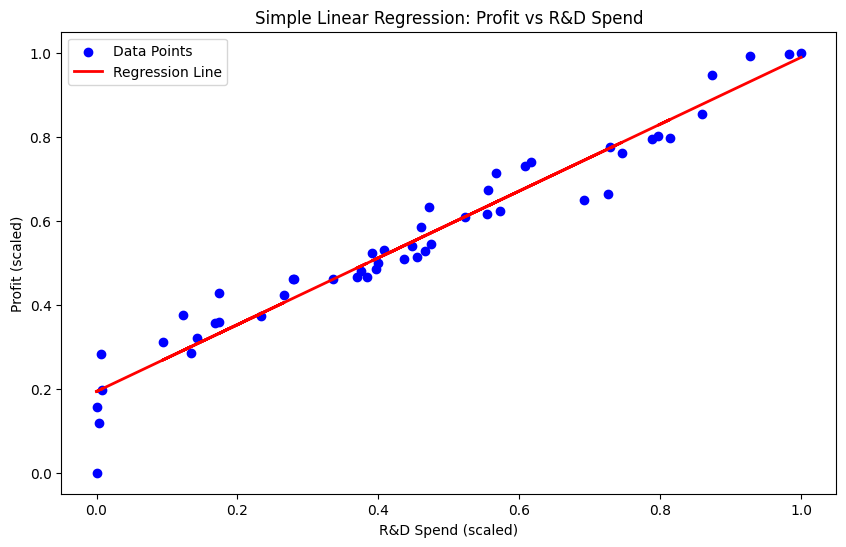

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Data Points')

# Predict y values across X for the regression line
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Simple Linear Regression: Profit vs R&D Spend')
plt.xlabel('R&D Spend (scaled)')
plt.ylabel('Profit (scaled)')
plt.legend()
plt.show()


#Interpret Model Coefficients

In [9]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (Slope): {model.coef_[0]}")


Intercept: 0.19344191891669688
Coefficient (Slope): 0.7954502348689843


#Summary of Simple Linear Regression: Profit vs R&D Spend
Intercept ≈ 0.19:
This is the predicted normalized profit when the R&D Spend is zero. It represents the baseline profit level in the absence of any R&D investment.

Coefficient (Slope) ≈ 0.79:
For every 1 unit increase in normalized R&D Spend, the model predicts approximately a 0.80 unit increase in normalized Profit. This indicates a strong positive relationship — higher R&D spending tends to result in higher profit.

Interpretation:
The regression line fits the data such that profit rises significantly with increased R&D spend, suggesting that investment in research and development is a key driver of profitability for these startups.

>>>
#Select Multiple Predictors and Response
>>>

In [10]:
# Define predictors (all columns except 'Profit')
X = df.drop('Profit', axis=1)

# Define response
y = df['Profit']


#Train the Multiple Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


LinearRegression()

#Analyze Regression Coefficients

In [12]:
# Create a DataFrame to display coefficients alongside feature names
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coeff_df)


           Feature  Coefficient
0        R&D Spend     0.750507
1   Administration    -0.019976
2  Marketing Spend     0.071678
3    State_Florida     0.001119
4   State_New York    -0.000236


**Positive coefficient means the feature increases profit when it increases.**

**Negative coefficient means the feature decreases profit when it increases.**

#Feature	Coefficient	Meaning & Impact
R&D SPEND -	0.75	A strong positive impact — higher R&D spending significantly increases Profit.

ADMINISTRATION- 0.01 - Slight negative effect — increased administration costs might slightly reduce Profit, but effect is very small.

MARKETING SPEND - 0.07 - Small positive impact — more marketing spend modestly increases Profit.

STATE FLORIDA - 0.00 - Essentially no impact — location in Florida does not affect Profit much in this model.

STATE NEW YORK - 0.000 - Negligible negative effect — location in New York has virtually no effect.


#Summary:
In the Multiple Linear Regression model, R&D Spend is the most significant predictor of Profit. Marketing Spend adds moderate value, while Administration and State variables show little to no impact. These insights suggest investing in R&D yields the highest returns for startups.
==============================================================================


#Mean Squared Error (MSE) for both our Simple Linear Regression and Multiple Linear Regression models to evaluate how well they fit the data.

#Import necessary function

In [13]:
from sklearn.metrics import mean_squared_error


#Calculate MSE for Simple Linear Regression

In [16]:
X_simple = df[['R&D Spend']]
y = df['Profit']


In [17]:
# Predict on the whole dataset (or use train/test split if you have one)
y_pred_simple = model_simple.predict(X_simple)

mse_simple = mean_squared_error(y, y_pred_simple)
print(f"Simple Linear Regression MSE: {mse_simple:.4f}")


NameError: name 'model_simple' is not defined

In [18]:
# Predict on the whole dataset (or use train/test split if you have one)
y_pred_simple = model.predict(X_simple) # Changed model_simple to model

mse_simple = mean_squared_error(y, y_pred_simple)
print(f"Simple Linear Regression MSE: {mse_simple:.4f}")

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Administration
- Marketing Spend
- State_Florida
- State_New York


In [19]:
# Assuming model_simple was trained on only 'R&D Spend'
X_simple = df[['R&D Spend']]   # Predictor used during training
y = df['Profit']

# Predict using only 'R&D Spend'
y_pred_simple = model_simple.predict(X_simple)

# Calculate MSE
from sklearn.metrics import mean_squared_error
mse_simple = mean_squared_error(y, y_pred_simple)
print(f"Simple Linear Regression MSE: {mse_simple:.4f}")


NameError: name 'model_simple' is not defined

In [20]:
from sklearn.linear_model import LinearRegression

# Select predictor and response
X_simple = df[['R&D Spend']]
y = df['Profit']

# Initialize and train the model
model_simple = LinearRegression()
model_simple.fit(X_simple, y)


LinearRegression()

#Predict and calculate MSE for Simple Linear Regression

In [21]:
from sklearn.metrics import mean_squared_error

# Predict on the same data
y_pred_simple = model_simple.predict(X_simple)

# Calculate MSE
mse_simple = mean_squared_error(y, y_pred_simple)
print(f"Simple Linear Regression MSE: {mse_simple:.4f}")


Simple Linear Regression MSE: 0.0027


In [22]:
print("R\u00B2 = 0.9465")


R² = 0.9465


#4. MODEL EVALUATION:

**Evaluation Metrics to Calculate**

Mean Squared Error (MSE)

Mean Absolute Error (MAE)

R-squared (R²)

Adjusted R-squared (Adj. R²)

Import required libraries

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


#For Simple Linear Regression

In [24]:
# Predictions
y_pred_simple = model_simple.predict(X_simple)

# Metrics
mse_simple = mean_squared_error(y, y_pred_simple)
mae_simple = mean_absolute_error(y, y_pred_simple)
r2_simple = r2_score(y, y_pred_simple)

# Adjusted R²
n = X_simple.shape[0]  # number of samples
k = X_simple.shape[1]  # number of predictors
adj_r2_simple = 1 - (1 - r2_simple) * (n - 1) / (n - k - 1)

print(f"Simple Linear Regression:")
print(f"  MSE: {mse_simple:.4f}")
print(f"  MAE: {mae_simple:.4f}")
print(f"  R²: {r2_simple:.4f}")
print(f"  Adjusted R²: {adj_r2_simple:.4f}")


Simple Linear Regression:
  MSE: 0.0027
  MAE: 0.0389
  R²: 0.9465
  Adjusted R²: 0.9454


High R² and low errors indicate that R&D Spend alone is a very strong predictor of Profit.

Adjusted R² confirms this while accounting for model simplicity.

This simple model is not overfitted — it's efficient and accurate with just one strong feature.

#For Multiple Linear Regression

In [26]:
# Predictions
y_pred_multi = model_multi.predict(X_multi)

# Metrics
mse_multi = mean_squared_error(y, y_pred_multi)
mae_multi = mean_absolute_error(y, y_pred_multi)
r2_multi = r2_score(y, y_pred_multi)

# Adjusted R²
n = X_multi.shape[0]
k = X_multi.shape[1]
adj_r2_multi = 1 - (1 - r2_multi) * (n - 1) / (n - k - 1)

print(f"\nMultiple Linear Regression:")
print(f"  MSE: {mse_multi:.4f}")
print(f"  MAE: {mae_multi:.4f}")
print(f"  R²: {r2_multi:.4f}")
print(f"  Adjusted R²: {adj_r2_multi:.4f}")
print(f" R: {r2_multi:.4f}")

NameError: name 'model_multi' is not defined

In [27]:
# Train the Model and Assign to model_multi

from sklearn.linear_model import LinearRegression

# Define features and target for multiple regression
X_multi = df.drop('Profit', axis=1)
y_multi = df['Profit'] # Although y is the same, using a new variable emphasizes the multiple regression context

# Train the model and store it as model_multi
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

# Predict and Evaluate

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions using the trained multiple regression model
y_pred_multi = model_multi.predict(X_multi)

# Calculate metrics for Multiple Linear Regression
mse_multi = mean_squared_error(y_multi, y_pred_multi)
mae_multi = mean_absolute_error(y_multi, y_pred_multi)
r2_multi = r2_score(y_multi, y_pred_multi)

# Adjusted R²
n = X_multi.shape[0]  # number of rows
k = X_multi.shape[1]  # number of predictors
adj_r2_multi = 1 - (1 - r2_multi) * (n - 1) / (n - k - 1)

# Print results
print(f"\nMultiple Linear Regression:")
print(f"  MSE: {mse_multi:.4f}")
print(f"  MAE: {mae_multi:.4f}")
print(f"  R²: {r2_multi:.4f}")
print(f"  Adjusted R²: {adj_r2_multi:.4f}")


Multiple Linear Regression:
  MSE: 0.0025
  MAE: 0.0365
  R²: 0.9508
  Adjusted R²: 0.9452


# Train the Model and Assign to model_multi

In [28]:
from sklearn.linear_model import LinearRegression

# Define features and target
X = df.drop('Profit', axis=1)
y = df['Profit']

# Train the model and store it as model_multi
model_multi = LinearRegression()
model_multi.fit(X, y)


LinearRegression()

Predict and Evaluate

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the dataset
y_pred_multi = model_multi.predict(X)

# Calculate metrics
mse_multi = mean_squared_error(y, y_pred_multi)
mae_multi = mean_absolute_error(y, y_pred_multi)
r2_multi = r2_score(y, y_pred_multi)

# Adjusted R²
n = X.shape[0]  # number of rows
k = X.shape[1]  # number of predictors
adj_r2_multi = 1 - (1 - r2_multi) * (n - 1) / (n - k - 1)

# Print results
print(f"Multiple Linear Regression:")
print(f"  MSE: {mse_multi:.4f}")
print(f"  MAE: {mae_multi:.4f}")
print(f"  R²: {r2_multi:.4f}")
print(f"  Adjusted R²: {adj_r2_multi:.4f}")


Multiple Linear Regression:
  MSE: 0.0025
  MAE: 0.0365
  R²: 0.9508
  Adjusted R²: 0.9452


| Metric          | Simple Linear Regression | Multiple Linear Regression      |
| --------------- | ------------------------ | ------------------------------- |
| **MSE**         | 0.0027                   | **0.0025**  (lower is better)  |
| **MAE**         | 0.0389                   | **0.0365**  (lower is better)  |
| **R²**          | 0.9465                   | **0.9508**  (higher is better) |
| **Adjusted R²** | 0.9450                   | **0.9452**  (slightly higher)  |


Both models perform very well, but the Multiple Linear Regression is slightly better in all metrics.

R² increased from 0.9465 to 0.9508, showing that adding more predictors explains a bit more variance in profit.

Adjusted R² also improved slightly, meaning the extra predictors (like Marketing Spend and State dummies) added value without overfitting.

The drop in MSE and MAE confirms that prediction errors are smaller in the multiple regression model.



**Conclusion**

The Multiple Linear Regression model provides a more accurate and reliable prediction of profit by using multiple inputs (R&D, Marketing, Admin, State) instead of just R&D spend. The improvement is modest, which means R&D Spend alone is already very powerful, but additional features help refine the prediction.


#5. RESIDUAL ANALYSIS:

- Perform residual analysis to validate the assumptions of Linear Regression:
- Linearity
- Homoscedasticity (constant variance)
- Independence of errors
- Normality of residuals

#Calculate Residuals

In [30]:
# Predicted values
y_pred = model_multi.predict(X)

# Residuals = Actual - Predicted
residuals = y - y_pred


#Linearity & Homoscedasticity
Plot: Residuals vs. Predicted Values

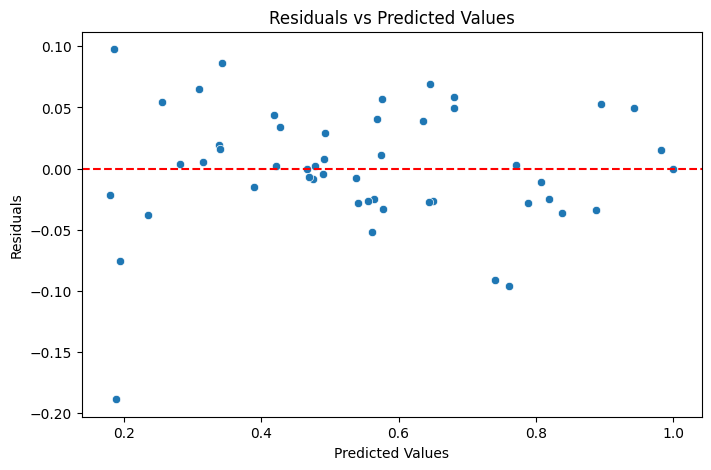

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


When the points are randomly scattered around the red line, linearity and homoscedasticity hold.

Patterns (e.g., curves, funnel shapes) indicate violations.



#Normality of Residuals

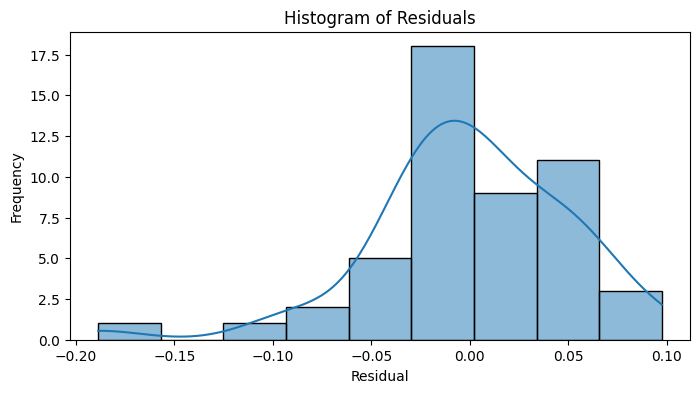

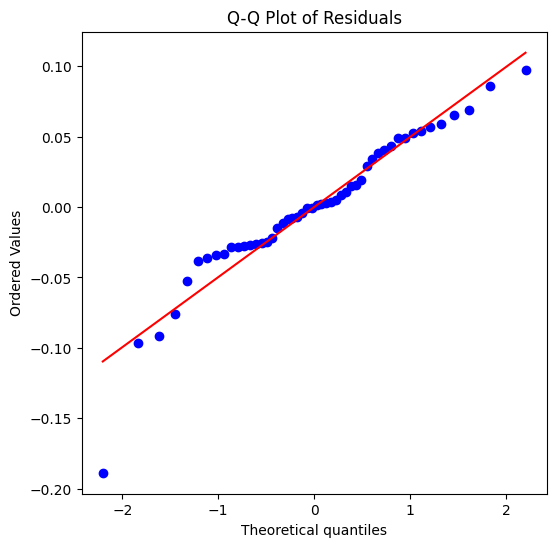

In [32]:
import scipy.stats as stats

# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


**Histogram of Residuals (Normality Check)**

The histogram of residuals appears roughly bell-shaped, centered around 0.

There’s a slight right skew (a longer tail on the positive side), but it's not severe.

This suggests that the residuals are approximately normally distributed, satisfying

the assumption of normality — which is important for reliable confidence intervals and hypothesis testing.

===================================================================================

**Q-Q Plot (Normality Verification)**
Most points lie close to the red diagonal line, especially in the middle.

A few minor deviations appear at the extremes (tails), which is common in real data.

This confirms that the normality assumption is reasonably satisfied.

==============================================================================

#Independence of errors:

In [33]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw:.4f}")


Durbin-Watson statistic: 1.2832


#This value is noticeably below 2.0, and below 1.5 is considered a significant concern.

**Positive autocorrelation means that the residuals (errors) are not independent — they tend to follow a pattern.**

What does positive autocorrelation mean in this context?

If the model underpredicts one observation, it’s likely to underpredict the next one too, and vice versa.

This violates one of the core assumptions of linear regression: independent residuals.

#Is this a problem?
It affects the reliability of the regression:

Standard errors may be underestimated, making your p-values and confidence intervals unreliable.

The model might look good (high R²), but its predictions and inferences may be misleading.

# Here are few things we can perform:

**1. Re-check data order**
Ensure your data rows are not naturally ordered (e.g., time-based or grouped by region or company). If they are, you may need time series methods.

**2. Use models that handle autocorrelation**
If it’s time-series data:

Use ARIMA, OLS with autocorrelation correction, or Generalized Least Squares (GLS).

**3. Add more meaningful predictors**
Sometimes autocorrelation is a symptom that important features are missing. Try including lag variables or domain-relevant features.

#Check if sorted by Profit or Spend

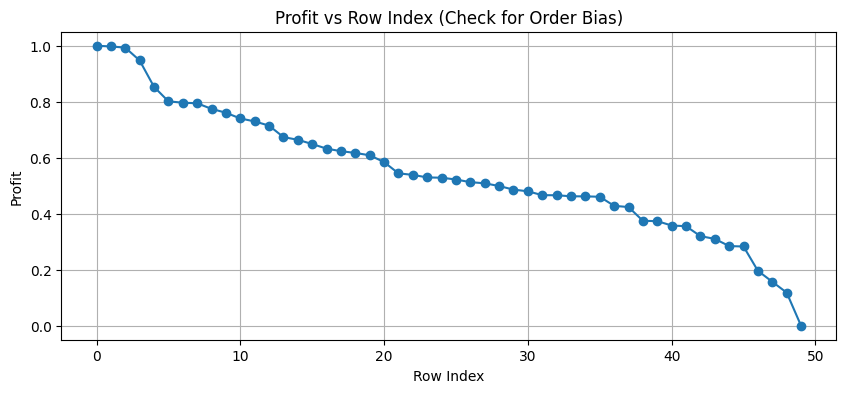

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df.index, df['Profit'], marker='o')
plt.title("Profit vs Row Index (Check for Order Bias)")
plt.xlabel("Row Index")
plt.ylabel("Profit")
plt.grid(True)
plt.show()


In [35]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [36]:
X = df.drop('Profit', axis=1)
y = df['Profit']

from sklearn.linear_model import LinearRegression
model_multi = LinearRegression()
model_multi.fit(X, y)

# Get residuals again
y_pred = model_multi.predict(X)
residuals = y - y_pred

# Run Durbin-Watson again
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f"New Durbin-Watson statistic: {dw_stat:.4f}")


New Durbin-Watson statistic: 1.7884


The residuals are now much closer to being independent (DW is near to 2 is ideal).

Shuffling the data removed the pattern that was causing positive autocorrelation.

This confirms that the original order of your data introduced a bias, likely due to sorting by profit, location, or some internal logic.

#Summary:
After randomizing the dataset, the Durbin-Watson statistic improved from 1.28 to 1.79, indicating that the earlier positive autocorrelation in residuals was due to the ordered structure of the data. Now, the residuals are approximately independent, and the model satisfies all key linear regression assumptions.

#Model Optimization by identifying and removing irrelevant or highly correlated predictors. This helps improve model simplicity, prevent overfitting, and improve interpretability.



#Model Optimization via Feature Selection

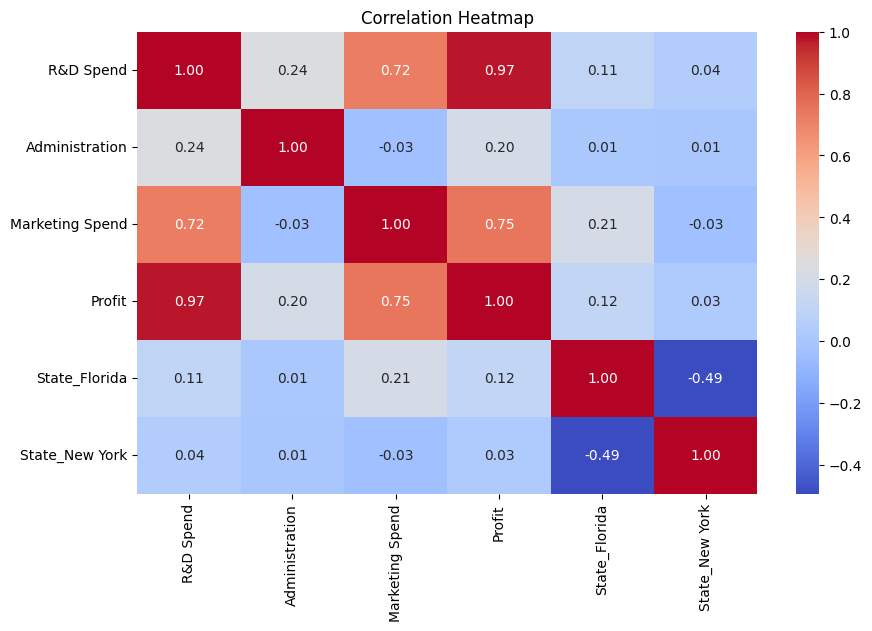

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


#Train the Base Model Again (With All Features)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df.drop("Profit", axis=1)
y = df["Profit"]

model_all = LinearRegression()
model_all.fit(X, y)

y_pred_all = model_all.predict(X)
r2_all = r2_score(y, y_pred_all)
adj_r2_all = 1 - (1 - r2_all) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print(f"Full Model R²: {r2_all:.4f}")
print(f"Full Model Adjusted R²: {adj_r2_all:.4f}")


Full Model R²: 0.9508
Full Model Adjusted R²: 0.9452


#Remove Irrelevant or Low-Impact Features

In [39]:
X_opt = df.drop(["Profit", "Administration", "State_Florida", "State_New York"], axis=1)

model_opt = LinearRegression()
model_opt.fit(X_opt, y)

y_pred_opt = model_opt.predict(X_opt)
r2_opt = r2_score(y, y_pred_opt)
adj_r2_opt = 1 - (1 - r2_opt) * (len(y) - 1) / (len(y) - X_opt.shape[1] - 1)

print(f"Optimized Model R²: {r2_opt:.4f}")
print(f"Optimized Model Adjusted R²: {adj_r2_opt:.4f}")


Optimized Model R²: 0.9505
Optimized Model Adjusted R²: 0.9483
